<a href="https://colab.research.google.com/github/samindelhi/CNN-Exercises/blob/main/DL_Module02_FasionMNIST_PyTorch_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Neural Network example using PyTorch


In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Lambda, Compose
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt


In [2]:
# Download training data from opendatasets
training_data = FashionMNIST(
    root='data',
    train=True,
    download = True,
    transform = ToTensor()
)

testing_data = FashionMNIST(
    root='data',
    train=False,
    download = True,
    transform = ToTensor()
)



100%|██████████| 26.4M/26.4M [00:02<00:00, 11.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.74MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 22.8MB/s]


In [3]:
batch_size = 64

# Create data loaders

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(testing_data, batch_size=batch_size)

for X,y in test_dataloader:
  print("Shape of X [N,C,H,W]", X.shape)
  print("Shape of y: ", y.shape, y.dtype)
  break;

Shape of X [N,C,H,W] torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [4]:
# Get cpu or gpu device for training
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using {device} device")


using cuda device


In [5]:
# Define the NN model
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()

    # Hidden layers with ReLu Activation Function
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)   # Output layer
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits   # probability



In [6]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [7]:
# Cross Entropy Loss calculaton --> because it is a multiclass classification problem

loss_fn = nn.CrossEntropyLoss()

# Optimizer --> SGD -- Stochastic Gradient Descent

optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)



In [8]:
# Model Training
def train(dataloader, model, loss_fn, optimizer ):
  size = len(dataloader.dataset)
  model.train()

  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device), y.to(device) # related to gpu computation

    # Compute prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if(batch %100 == 0):
      loss, current = loss.item(), batch * len(X)
      print(f"Loss: {loss} [{current}/{size}]")

In [9]:
def test(dataloader, model,loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)

  model.eval()

  test_loss, correct = 0, 0

  with torch.no_grad():
    for X,y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)

      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches # average loss per batch
  correct /= size # %age of correct predictions or accuracy

  print(f" Test Error: \n Accuracy: {100*correct} %, Avg loss {test_loss}\n")



In [11]:
epochs = 10
for t in range(epochs):
  print(f"Epoch {t+1} \n ----------------------")
  train(train_dataloader, model, loss_fn, optimizer)
  test(test_dataloader, model, loss_fn)


Epoch 1 
 ----------------------
Loss: 1.1782703399658203 [0/60000]
Loss: 1.1699771881103516 [6400/60000]
Loss: 1.0076433420181274 [12800/60000]
Loss: 1.1339435577392578 [19200/60000]
Loss: 1.014875888824463 [25600/60000]
Loss: 1.0362858772277832 [32000/60000]
Loss: 1.0687804222106934 [38400/60000]
Loss: 1.0138875246047974 [44800/60000]
Loss: 1.049606442451477 [51200/60000]
Loss: 0.9722402095794678 [57600/60000]
 Test Error: 
 Accuracy: 66.32000000000001 %, Avg loss 0.9964637813294769

Epoch 2 
 ----------------------
Loss: 1.0516248941421509 [0/60000]
Loss: 1.0641971826553345 [6400/60000]
Loss: 0.8856704235076904 [12800/60000]
Loss: 1.0368317365646362 [19200/60000]
Loss: 0.9199841022491455 [25600/60000]
Loss: 0.9375115633010864 [32000/60000]
Loss: 0.9880577921867371 [38400/60000]
Loss: 0.9341127872467041 [44800/60000]
Loss: 0.964229941368103 [51200/60000]
Loss: 0.9024519920349121 [57600/60000]
 Test Error: 
 Accuracy: 67.75999999999999 %, Avg loss 0.9193061673717134

Epoch 3 
 -------

In [12]:
# Save model

torch.save(model.state_dict(), "model.pth")
print("Saved model state to model.pth")


Saved model state to model.pth


In [24]:
## Prediction

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
    ]

model.eval()

x, y = testing_data[15][0], testing_data[15][1]

x = x.to(device)

with torch.no_grad():
  pred = model(x)
  predicted, actual = classes[pred[0].argmax(0)], classes[y]

  print(f"Predicted: {predicted} Actual: {actual}")

Predicted: Trouser Actual: Trouser


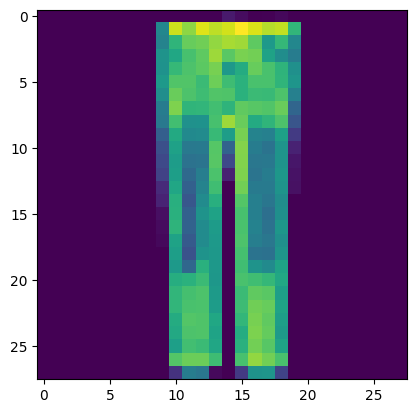

In [25]:
import matplotlib.pyplot as plt

# Assuming 'x' contains the image data
plt.imshow(x.cpu().squeeze())  # Move tensor to CPU if using GPU
plt.show()